## Stock Data Prediction using Prophet

---

This notebook performs a basic stock price forecasting analysis using historical hourly data for a specified stock ticker. It utilizes the `yfinance` library to download the data and then applies two simple forecasting methods: a naive forecast (repeating the last observed value) and a moving average forecast. The results are then visualized to compare the historical data with the forecasts.

---


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # Import data directly from Yahoo Finance

## Download the Data

In [2]:
stock = "AAPL"  # AAPL stock

# Download the last 60 days of hourly close prices
df = yf.download(
    stock,
    period="60d",
    interval="60m",
    auto_adjust=True,
    progress=False,
)

df = df[["Close"]].copy()
df.tail()

Price,Close
Ticker,AAPL
Datetime,
2025-09-25 15:30:00+00:00,252.530304
2025-09-25 16:30:00+00:00,253.500000
2025-09-25 17:30:00+00:00,254.559998
2025-09-25 18:30:00+00:00,256.959991
2025-09-25 19:30:00+00:00,256.940002


In [3]:
# Check if the index has a timezone, if not, localise to UTC
if df.index.tz is None:
    df.index = df.index.tz_localize("UTC")

# Convert to Malaysia timezone
df.index = df.index.tz_convert("Asia/Kuala_Lumpur")

# Ensure hourly frequency and forward-fill missing values
close = df["Close"].asfreq("H").ffill()
close.tail()

/tmp/ipython-input-1138469034.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  close = df["Close"].asfreq("H").ffill()


Ticker,AAPL
Datetime,
2025-09-25 23:30:00+08:00,252.530304
2025-09-26 00:30:00+08:00,253.500000
2025-09-26 01:30:00+08:00,254.559998
2025-09-26 02:30:00+08:00,256.959991
2025-09-26 03:30:00+08:00,256.940002


## Forecast

In [4]:
# Forecast: assume the next 24 hours repeat the last observed value
last_value = close.iloc[-1]

# Create a future index (next 48 hours, hourly)
future_index = pd.date_range(
    start=close.index[-1] + pd.Timedelta(hours=1),
    periods=48,
    freq="H",
)

# Build forecast DataFrame
forecast = pd.DataFrame(
    {"forecast": [last_value] * 48},
    index=future_index,
)

forecast.head()

/tmp/ipython-input-4254224099.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_index = pd.date_range(


,forecast
2025-09-26 04:30:00+08:00,Ticker AAPL 256.940002 Name: 2025-09-26 03:...
2025-09-26 05:30:00+08:00,Ticker AAPL 256.940002 Name: 2025-09-26 03:...
2025-09-26 06:30:00+08:00,Ticker AAPL 256.940002 Name: 2025-09-26 03:...
2025-09-26 07:30:00+08:00,Ticker AAPL 256.940002 Name: 2025-09-26 03:...
2025-09-26 08:30:00+08:00,Ticker AAPL 256.940002 Name: 2025-09-26 03:...


## Set the Moving Average to Keep Track

In [5]:
# Forecast: assume the next 48 hours repeat the 24-hour moving average
ma_value = close.tail(24).mean()

forecast_ma = pd.DataFrame(
    {"forecast": [ma_value] * 48},
    index=future_index,
)

forecast_ma.head()

,forecast
2025-09-26 04:30:00+08:00,Ticker AAPL 252.919604 dtype: float64
2025-09-26 05:30:00+08:00,Ticker AAPL 252.919604 dtype: float64
2025-09-26 06:30:00+08:00,Ticker AAPL 252.919604 dtype: float64
2025-09-26 07:30:00+08:00,Ticker AAPL 252.919604 dtype: float64
2025-09-26 08:30:00+08:00,Ticker AAPL 252.919604 dtype: float64


## Plot the Forecast

/tmp/ipython-input-928883219.py:5: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  close.last("3D").index,
/tmp/ipython-input-928883219.py:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  close.last("3D").values,
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


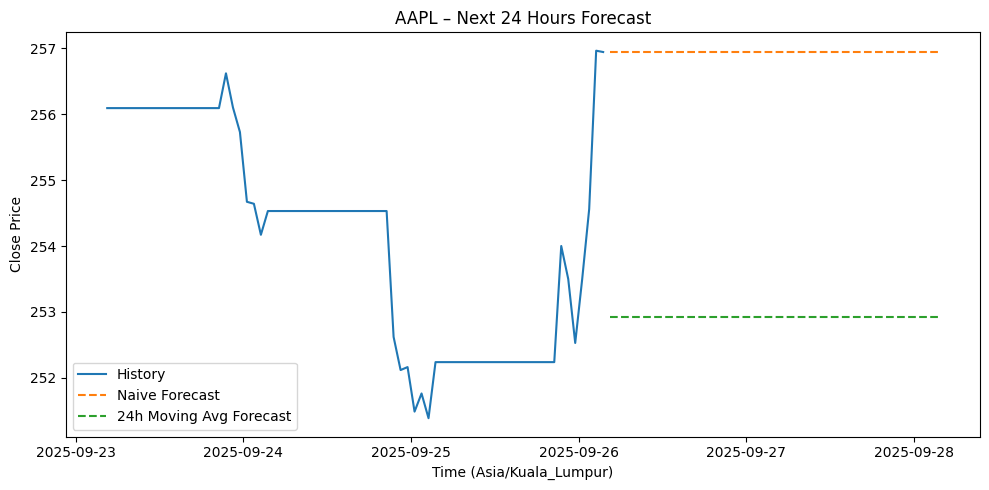

In [6]:
plt.figure(figsize=(10, 5))

# Plot last 3 days of history
plt.plot(
    close.last("3D").index,
    close.last("3D").values,
    label="History",
)

# Plot naive forecast
plt.plot(
    forecast.index,
    forecast["forecast"],
    label="Naive Forecast",
    linestyle="--",
)

# Plot moving average forecast
plt.plot(
    forecast_ma.index,
    forecast_ma["forecast"],
    label="24h Moving Avg Forecast",
    linestyle="--",
)

plt.title(f"{stock} – Next 24 Hours Forecast")
plt.xlabel("Time (Asia/Kuala_Lumpur)")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

## Findings and Conclusion

This analysis demonstrates two simple forecasting methods for stock prices: a naive forecast and a moving average forecast. As shown in the plot, both methods provide a basic projection based on historical data.

The naive forecast simply repeats the last observed price, which can be useful for very short-term predictions but is unlikely to capture any trends or patterns. The moving average forecast smooths out recent price fluctuations and can provide a slightly more stable prediction.

It is important to note that these are very basic forecasting methods and do not account for various factors that influence stock prices, such as market news, economic indicators, or company-specific events. Therefore, they should not be used for making investment decisions. More sophisticated forecasting models, such as those based on time series analysis (e.g., ARIMA, Prophet) or machine learning techniques, would be required for more accurate predictions.